In [1]:
import pandas as pd
from data_pipeline.dataset import Dataset

In [2]:
df = pd.read_feather("../../data/parquet_files/train/processed_train.feather")
df.head()

,case_id,target,numberofcontrsvalue_358L_max_0,nominalrate_281L_min_0,classificationofcontr_400M_mode_0,totaldebtoverduevalue_178A_max_0,collater_valueofguarantee_876L_mean_0,pmts_overdue_1140A_max_0,credacc_cards_status_52L_mode_0,credacc_cards_status_52L_last_0
0,0,0,NaN,NaN,None,NaN,NaN,NaN,None,None
1,1,0,NaN,NaN,None,NaN,NaN,NaN,None,None
2,2,0,NaN,NaN,None,NaN,NaN,NaN,None,None
3,3,0,NaN,NaN,None,NaN,NaN,NaN,None,None
4,4,1,NaN,NaN,None,NaN,NaN,NaN,None,None


In [14]:
df_test.head()

,case_id,numberofcontrsvalue_358L_max_0,nominalrate_281L_min_0,classificationofcontr_400M_mode_0,totaldebtoverduevalue_178A_max_0,collater_valueofguarantee_876L_mean_0,pmts_overdue_1140A_max_0,credacc_cards_status_52L_mode_0,credacc_cards_status_52L_last_0
0,57543,NaN,NaN,None,NaN,NaN,107427.52,None,NaN
1,57549,1.0,NaN,ea6782cc,NaN,NaN,NaN,None,NaN
2,57551,NaN,NaN,None,NaN,NaN,NaN,None,NaN
3,57552,NaN,NaN,None,NaN,NaN,NaN,None,NaN
4,57569,NaN,NaN,None,NaN,NaN,NaN,None,NaN


In [15]:
df_test.shape

(10, 9)

In [5]:

from optbinning import OptimalBinning

optb = OptimalBinning(name='test', dtype="categorical", solver="cp")

In [20]:
optb.fit(df['classificationofcontr_400M_mode_0'], df['target'])

OptimalBinning(dtype='categorical', name='test')

In [21]:
optb.transform(df['classificationofcontr_400M_mode_0'])

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
optb.transform(df_test['classificationofcontr_400M_mode_0'])

array([0.        , 0.27226398, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [23]:
df_test

,case_id,numberofcontrsvalue_358L_max_0,nominalrate_281L_min_0,classificationofcontr_400M_mode_0,totaldebtoverduevalue_178A_max_0,collater_valueofguarantee_876L_mean_0,pmts_overdue_1140A_max_0,credacc_cards_status_52L_mode_0,credacc_cards_status_52L_last_0
0,57543,NaN,NaN,None,NaN,NaN,107427.52,None,NaN
1,57549,1.0,NaN,ea6782cc,NaN,NaN,NaN,None,NaN
2,57551,NaN,NaN,None,NaN,NaN,NaN,None,NaN
3,57552,NaN,NaN,None,NaN,NaN,NaN,None,NaN
4,57569,NaN,NaN,None,NaN,NaN,NaN,None,NaN
5,57630,NaN,NaN,None,NaN,NaN,NaN,None,NaN
6,57631,NaN,NaN,None,NaN,NaN,NaN,None,NaN
7,57632,NaN,NaN,None,NaN,NaN,NaN,None,NaN
8,57633,NaN,NaN,None,NaN,NaN,NaN,None,NaN
9,57634,NaN,NaN,None,NaN,NaN,NaN,None,NaN


In [ ]:
from hydra.utils import instantiate
from hydra import compose, initialize
from hydra.core.global_hydra import GlobalHydra
from data_pipeline.pipelinesteps import data_splitter


GlobalHydra.instance().clear()
initialize(config_path="../../", version_base=None)
cfg = compose(config_name="config")

data_pipeline = instantiate(cfg.data_pipeline)
df = pd.read_feather("../../data/parquet_files/train/processed_train.feather")
df = data_pipeline.apply(df)

dataset = Dataset(data=df, data_splitter=data_splitter, target_column='target')



In [15]:
dataset.X.head()

,case_id,numberofcontrsvalue_358L_max_0,nominalrate_281L_min_0,totaldebtoverduevalue_178A_max_0,collater_valueofguarantee_876L_mean_0,pmts_overdue_1140A_max_0,credacc_cards_status_52L_mode_0_ACTIVE,credacc_cards_status_52L_mode_0_BLOCKED,credacc_cards_status_52L_mode_0_CANCELLED,credacc_cards_status_52L_mode_0_INACTIVE,...,classificationofcontr_400M_mode_0_e5957374,classificationofcontr_400M_mode_0_e69bbbcb,classificationofcontr_400M_mode_0_e6e56e83,classificationofcontr_400M_mode_0_ea6782cc,classificationofcontr_400M_mode_0_ec922b98,classificationofcontr_400M_mode_0_edc37208,classificationofcontr_400M_mode_0_f0a30139,classificationofcontr_400M_mode_0_f920c170,classificationofcontr_400M_mode_0_fa2a66b3,classificationofcontr_400M_mode_0_fb98f5e4
0,0,NaN,NaN,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,NaN,NaN,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,NaN,NaN,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,NaN,NaN,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,NaN,NaN,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load a binary classification dataset



# Split the data into training and test sets
X_train, X_test, y_train, y_test = dataset.X_train, dataset.X_test, dataset.y_train, dataset.y_test 

# Train a HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)

# Predict the probabilities of the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC score: {auc_score}")

AUC score: 0.5949619853742303


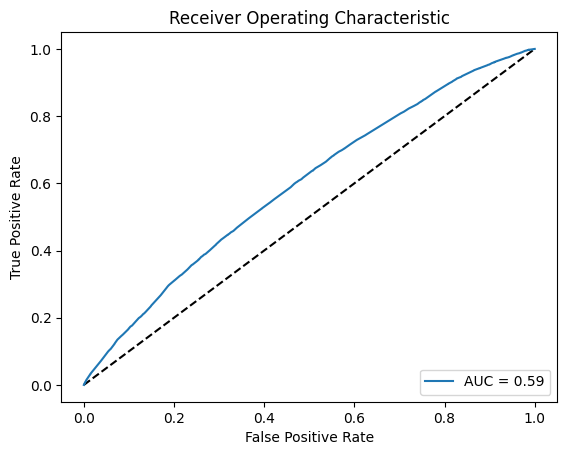

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# Plot the AUC score
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [8]:
df_test = pd.read_feather("../../data/parquet_files/test/processed_test.feather")
df_test = data_pipeline.apply(df_test)
df_test['target']  = 1
dataset_test = Dataset(data=df_test,  target_column='target')


NameError: name 'data_pipeline' is not defined

In [24]:
dataset_test.X.head()

,case_id,numberofcontrsvalue_358L_max_0,nominalrate_281L_min_0,totaldebtoverduevalue_178A_max_0,collater_valueofguarantee_876L_mean_0,pmts_overdue_1140A_max_0,classificationofcontr_400M_mode_0_ea6782cc
0,57543,NaN,NaN,NaN,NaN,107427.52,False
1,57549,1.0,NaN,NaN,NaN,NaN,True
2,57551,NaN,NaN,NaN,NaN,NaN,False
3,57552,NaN,NaN,NaN,NaN,NaN,False
4,57569,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
t = pd.DataFrame()

t['case_id'] = df['case_id']
t['score'] = pred_test

In [ ]:
t.to_csv('submission.csv', index=False)

In [ ]:
t.shape

(1526659, 2)

In [ ]:
t.dropna()

,case_id,score
0,0,0.036103
1,1,0.036103
2,2,0.036103
3,3,0.036103
4,4,0.036103
...,...,...
1526654,2703450,0.010810
1526655,2703451,0.034312
1526656,2703452,0.043671
1526657,2703453,0.020469


In [ ]:
df_test.shape

(1526659, 704)